# 1 ) DEFINICIÓN DEL PROYECTO DE MACHINE LEARNING

## **TÍTULO**

### **Optimización de modelos operativos en Telecom: Análisis Profundo de los contactos para Mejorar el CX**

## **TEMA**

##### **En este proyecto, llevaremos a cabo un análisis exhaustivo de las interacciones de los clientes con Telecom. Nuestro objetivo es descubrir insights a partir de un análisis profundo de los datos, correlacionando los mismo buscamos desarrollar conclusiones significativas, que no solo logren esclarecer  patrones de comportamiento de los clientes, sino que también proporcionen orientación para mejorar la experiencia del cliente de manera significativa.**

#### **El objetivo preponderante es dimensionar la demanda en volumen de llamados mediante un modelo predictivo de series temporales con una regresion lineal.

## **OBTENCIÓN DE LOS DATOS**

### DATASETS Y FUENTES ALTERNATIVAS DE DATOS

### Mi BBDD 5.000.- interacciones es obtenida desde una fuente pública:

 https://www.kaggle.com/datasets/datazng/telecom-company-churn-rate-call-center-data

# 2) IMPORTACIÓN DE LIBRERIAS

In [1]:
# PARA EL TRATAMIENTO DE LOS DATOS Y MODELOS PREDICTIVOS
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from warnings import simplefilter
simplefilter("ignore")

## IMPORTAMOS LA FUENTE PARA LAS FIGURAS

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

## IMPORTACIÓN DEL DATASET 

In [3]:
dataset = r"C:\Users\Lucia\Desktop\PROYECTO_MLP_PABLO_XAVIER\PROYECTO_MLP_PABLO_XAVIER_MENDEZ\src\data\process\telecom.csv"
df = pd.read_csv(dataset, parse_dates=['DATE'])



In [4]:
df.head()

,CALL ID,AGENT,DATE,DAY_OF_THE_WEEK,TIME,TOPIC,ANSWERED (Y/N),RESOLVED,SPEED OF ANSWER IN SECONDS,AVGTALKDURATION,SATISFACTION RATING
0,ID0033,Diane,2021-01-01,Friday,0 days 13:33:36,Technical Support,Y,Y,57.0,0 days 00:06:49,3.0
1,ID0056,Dan,2021-01-01,Friday,0 days 17:44:10,Streaming,Y,Y,83.0,0 days 00:06:45,4.0
2,ID0039,Stewart,2021-01-01,Friday,0 days 14:38:24,Contract related,Y,Y,74.0,0 days 00:06:41,1.0
3,ID0009,Greg,2021-01-01,Friday,0 days 11:13:55,Admin Support,Y,Y,15.0,0 days 00:06:38,4.0
4,ID0043,Diane,2021-01-01,Friday,0 days 14:47:02,Technical Support,Y,Y,45.0,0 days 00:06:21,3.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   CALL ID                     5000 non-null   object        
 1   AGENT                       5000 non-null   object        
 2   DATE                        5000 non-null   datetime64[ns]
 3   DAY_OF_THE_WEEK             5000 non-null   object        
 4   TIME                        5000 non-null   object        
 5   TOPIC                       5000 non-null   object        
 6   ANSWERED (Y/N)              5000 non-null   object        
 7   RESOLVED                    5000 non-null   object        
 8   SPEED OF ANSWER IN SECONDS  4054 non-null   float64       
 9   AVGTALKDURATION             5000 non-null   object        
 10  SATISFACTION RATING         4054 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage

### CREACION DE UN NUEVO DATAFRAME CON EL DETALLE DE LA CANTIDAD DE LLAMADAS POR DÍA

In [5]:
calls_per_date = df.groupby("DATE").size()


calls_per_date_df = pd.DataFrame(calls_per_date, columns=["CALLS"])

calls_per_date_df

,CALLS
DATE,
2021-01-01,58
2021-01-02,60
2021-01-03,58
2021-01-04,54
2021-01-05,56
...,...
2021-03-27,58
2021-03-28,38
2021-03-29,60


In [6]:
calls_per_date_df['time'] = np.arange(len(calls_per_date_df.index))

calls_per_date_df.head()

,CALLS,time
DATE,,
2021-01-01,58,0
2021-01-02,60,1
2021-01-03,58,2
2021-01-04,54,3
2021-01-05,56,4


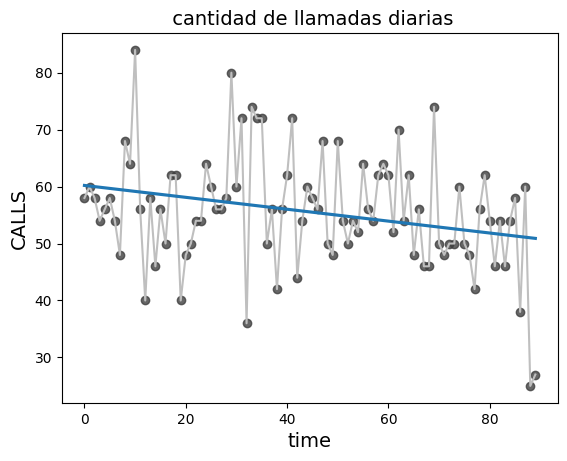

In [7]:
fig, ax = plt.subplots()
ax.plot(calls_per_date_df['time'].values, calls_per_date_df['CALLS'].values, color='0.75')
ax = sns.regplot(x='time', y='CALLS', data=calls_per_date_df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title(' cantidad de llamadas diarias');

## modelo Series temporales,  modelo de regresion lineal

In [10]:
X = calls_per_date_df.loc[:, ['time']]
y = calls_per_date_df.loc[:, 'CALLS']

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

In [11]:
model.coef_


array([-0.10445734])

In [12]:
model.intercept_

60.20390720390721

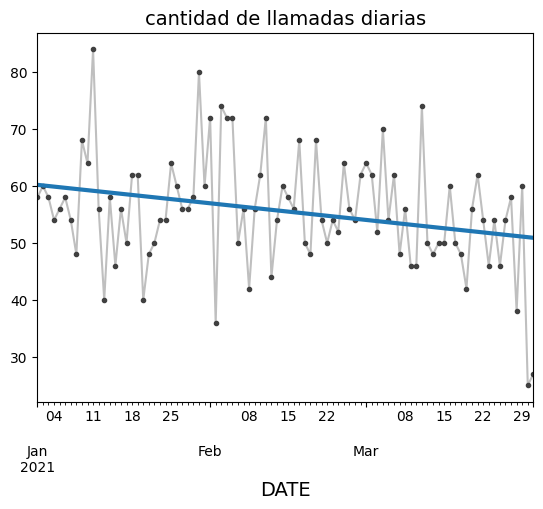

In [13]:
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('cantidad de llamadas diarias');

## lag feature

In [14]:
calls_per_date_df['Lag_1'] = calls_per_date_df['CALLS'].shift(1)
calls_per_date_df.head()

,CALLS,time,Lag_1
DATE,,,
2021-01-01,58,0,NaN
2021-01-02,60,1,58.0
2021-01-03,58,2,60.0
2021-01-04,54,3,58.0
2021-01-05,56,4,54.0


In [20]:

from sklearn.linear_model import LinearRegression

X = calls_per_date_df.loc[:, ['Lag_1']]

X.dropna(inplace=True) 

y = calls_per_date_df.loc[:, 'CALLS']

y, X = y.align(X, join='inner')

model = LinearRegression()

model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

Text(0.5, 1.0, 'Lag Plot llamadas por día')

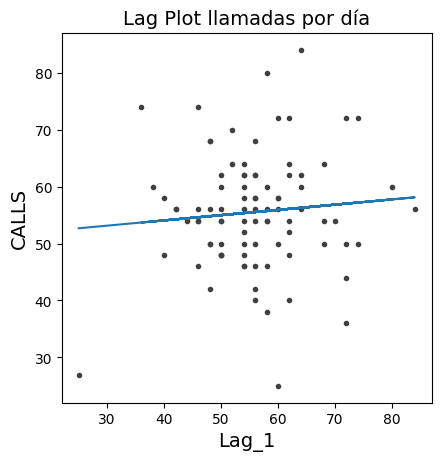

In [22]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'].values, y.values, '.', color='0.25')
ax.plot(X['Lag_1'].values, y_pred.values)
ax.set_aspect('equal')
ax.set_ylabel('CALLS')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot llamadas por día')

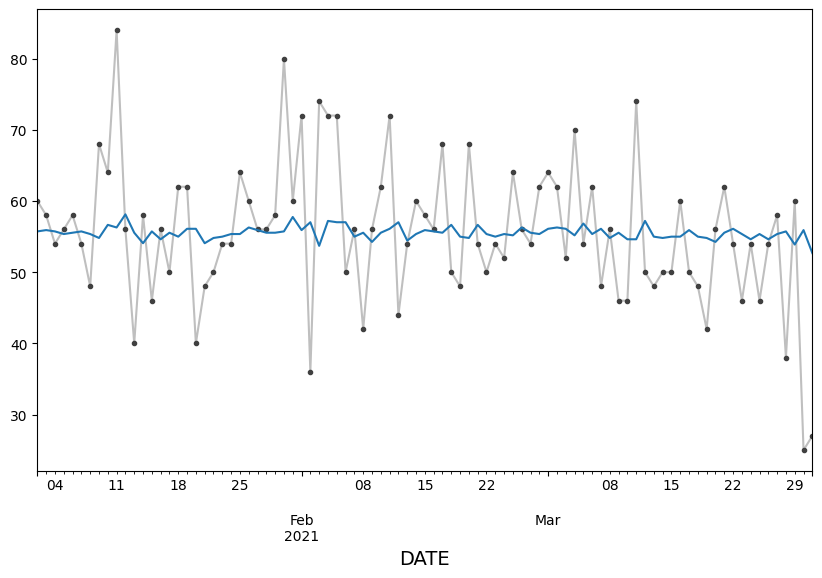

In [23]:
plt.figure(figsize=(10,6))
ax = y.plot(**plot_params)
ax = y_pred.plot()

In [24]:
y_pred

DATE
2021-01-02    55.723751
2021-01-03    55.908025
2021-01-04    55.723751
2021-01-05    55.355204
2021-01-06    55.539478
                ...    
2021-03-27    55.355204
2021-03-28    55.723751
2021-03-29    53.881013
2021-03-30    55.908025
2021-03-31    52.683233
Length: 89, dtype: float64

___________________________

In [25]:
dataset = r"C:\Users\Lucia\Desktop\PROYECTO_MLP_PABLO_XAVIER\PROYECTO_MLP_PABLO_XAVIER_MENDEZ\src\data\process\telecom.csv"
df = pd.read_csv(dataset, parse_dates=['DATE'])

In [28]:
import pandas as pd

# Suponiendo que 'calls_per_date' es el DataFrame que contiene la cantidad de llamadas por fecha

# Crear un DataFrame con el índice como las fechas y la columna de cantidad de llamadas
calls_per_date_df = pd.DataFrame(calls_per_date, columns=["CALLS"])

# Convertir el índice de fecha a tipo Period
calls_per_date_df.index = pd.to_datetime(calls_per_date_df.index).to_period('D')

print(calls_per_date_df)

            CALLS
DATE             
2021-01-01     58
2021-01-02     60
2021-01-03     58
2021-01-04     54
2021-01-05     56
...           ...
2021-03-27     58
2021-03-28     38
2021-03-29     60
2021-03-30     25
2021-03-31     27

[90 rows x 1 columns]


<Axes: title={'center': 'Tunnel Traffic - 365-Day Moving Average'}, xlabel='DATE'>

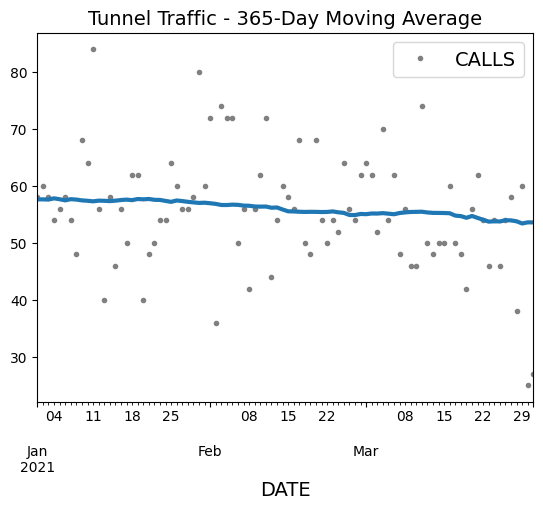

In [30]:
moving_average = calls_per_date_df.rolling(
    window=90,       
    center=True,      # sitúa la media en el centro de la ventana
    min_periods=45,  # elija aproximadamente la mitad del tamaño de la ventana
).mean()              

ax = calls_per_date_df.plot(style=".", color="0.5")
moving_average.plot(
    ax=ax, linewidth=3, title="ll - 365-Day Moving Average", legend=False,)